北京地铁站系统

In [247]:
import requests
from bs4 import BeautifulSoup
import json

In [248]:
class Subway(object):
    
    def __init__(self):
        self.url = "http://map.amap.com/subway/index.html?&1100"
        self.headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) '
                          'Chrome/63.0.3239.132 Safari/537.36'
        }
    def get_data(self):
        responses = requests.get(url = self.url, headers = self.headers)
        return responses.text
    
    def parse_get_subway(self, ID, city, name):
        url = "http://map.amap.com/service/subway?_1555502190153&srhdata=" + ID + '_drw_' + city + '.json'
        response = requests.get(url = url, headers = self.headers)
        html = response.text
        result = json.loads(html)
        stas = []
        for node in result["l"]:
            for start in node["st"]:
                if len(node["la"]) > 0:
                    sta = [node["ln"]  + node["la"] + " " + start["n"] + " " + start["sl"]][0]
                    stas.append(sta)
                    print(sta)
                    
                else:
                    sta = [node["ln"]  + node["la"] + " " + start["n"] + " " + start["sl"]][0]
                    print(sta)
                    stas.append(sta)

        with open('subway.txt', 'w', encoding='utf8') as f:
            for line in stas:
                f.write(line + "\n")

        
    def parse_city_data(self, data):
        # 对数据进行编码
        data = data.encode('ISO-8859-1')
        data = data.decode('utf-8')
        soup = BeautifulSoup(data, 'lxml')

        # 获取城市信息
        res1 = soup.find_all(class_="city-list fl")[0]
        res2 = soup.find_all(class_="more-city-list")[0]

        # 遍历a标签
        for temp in res1.find_all('a'):
            # 城市ID值
            ID = temp['id']
            # 城市拼音名
            city_name = temp['cityname']
            # 城市名
            name = temp.get_text()
            
            if name == "北京":
                self.parse_get_subway(ID, city_name, name)
 
    def run(self):
        data = self.get_data()
        self.parse_city_data(data) 
                        

In [249]:
# subway = Subway()
# subway.run()

In [250]:
# 获取地铁站各路线站点及经纬度
stations = []
station = {'line':"", 'station':"", 'lon_lat':""}
with open('subway.txt', "r", encoding = "utf-8") as f:    #设置文件对象
    for line in f.readlines():
        line = line.strip("\n")
        line = line.split(" ")
        station["line"] = line[0]
        station["station"] = line[1]
        station["lon_lat"] = line[2]
        stations.append(station.copy())

In [251]:
stations

[{'line': 'S1线', 'station': '金安桥', 'lon_lat': '116.163167,39.923620'},
 {'line': 'S1线', 'station': '四道桥', 'lon_lat': '116.134010,39.916030'},
 {'line': 'S1线', 'station': '桥户营', 'lon_lat': '116.125809,39.912383'},
 {'line': 'S1线', 'station': '上岸', 'lon_lat': '116.122225,39.905138'},
 {'line': 'S1线', 'station': '栗园庄', 'lon_lat': '116.123254,39.895780'},
 {'line': 'S1线', 'station': '小园', 'lon_lat': '116.114443,39.890465'},
 {'line': 'S1线', 'station': '石厂', 'lon_lat': '116.100334,39.889378'},
 {'line': '1号线', 'station': '苹果园', 'lon_lat': '116.177388,39.926727'},
 {'line': '1号线', 'station': '古城', 'lon_lat': '116.190337,39.907450'},
 {'line': '1号线', 'station': '八角游乐园', 'lon_lat': '116.212684,39.907442'},
 {'line': '1号线', 'station': '八宝山', 'lon_lat': '116.235948,39.907440'},
 {'line': '1号线', 'station': '玉泉路', 'lon_lat': '116.252888,39.907433'},
 {'line': '1号线', 'station': '五棵松', 'lon_lat': '116.273987,39.907456'},
 {'line': '1号线', 'station': '万寿路', 'lon_lat': '116.294765,39.907474'},
 {'line'

In [252]:
import re
def get_station_info(stations):
    station_location = {}
    for line in stations:
        if line == "":
            continue
        line = str(line)
        station_name = re.findall("'station': '(\w+)'", line)[0]
        x_y = re.findall("'lon_lat': '(\d+.\d+),(\d+.\d+)'", line)[0]
        x_y = tuple(map(float,x_y))
        station_location[station_name] = x_y
    return station_location

In [253]:
station_info = get_station_info(stations)

In [254]:
station_info

{'金安桥': (116.163167, 39.92362),
 '四道桥': (116.13401, 39.91603),
 '桥户营': (116.125809, 39.912383),
 '上岸': (116.122225, 39.905138),
 '栗园庄': (116.123254, 39.89578),
 '小园': (116.114443, 39.890465),
 '石厂': (116.100334, 39.889378),
 '苹果园': (116.177388, 39.926727),
 '古城': (116.190337, 39.90745),
 '八角游乐园': (116.212684, 39.907442),
 '八宝山': (116.235948, 39.90744),
 '玉泉路': (116.252888, 39.907433),
 '五棵松': (116.273987, 39.907456),
 '万寿路': (116.294765, 39.907474),
 '公主坟': (116.309919, 39.907469),
 '军事博物馆': (116.321459, 39.907422),
 '木樨地': (116.337583, 39.907379),
 '南礼士路': (116.352583, 39.907234),
 '复兴门': (116.356866, 39.907242),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.391278, 39.907472),
 '天安门东': (116.401216, 39.90778),
 '王府井': (116.411571, 39.908069),
 '东单': (116.41848, 39.908325),
 '建国门': (116.435806, 39.908501),
 '永安里': (116.450497, 39.908454),
 '国贸': (116.461841, 39.909104),
 '大望路': (116.475783, 39.908287),
 '四惠': (116.495456, 39.908749),
 '四惠东': (116.515664, 39.908495),
 '积水潭': (116.373126

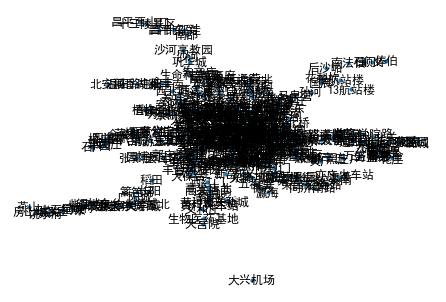

In [255]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
Graph = nx.Graph() 
Graph.add_nodes_from(list(station_info.keys()))
nx.draw(Graph, station_info, with_labels=True, node_size=10)
plt.show()

In [256]:
from collections import defaultdict
def get_line_info(stations):
    station_location = defaultdict(list)
    new_linename = "S1线"
    for line in stations:
        line = str(line)
        line_name = re.findall("'line': '(\w+)'", line)[0]
        station_name = re.findall("'station': '(\w+)'", line)[0]
        if new_linename == line_name:
            station_location[line_name].append(station_name)
        else:
            station_location[line_name].append(station_name)
        new_linename = line_name
    return station_location

In [257]:
station_location = get_line_info(stations)

In [258]:
station_location

defaultdict(list,
            {'S1线': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂'],
             '1号线': ['苹果园',
              '古城',
              '八角游乐园',
              '八宝山',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '木樨地',
              '南礼士路',
              '复兴门',
              '西单',
              '天安门西',
              '天安门东',
              '王府井',
              '东单',
              '建国门',
              '永安里',
              '国贸',
              '大望路',
              '四惠',
              '四惠东'],
             '2号线': ['积水潭',
              '鼓楼大街',
              '安定门',
              '雍和宫',
              '东直门',
              '东四十条',
              '朝阳门',
              '建国门',
              '北京站',
              '崇文门',
              '前门',
              '和平门',
              '宣武门',
              '长椿街',
              '复兴门',
              '阜成门',
              '车公庄',
              '西直门'],
             '4号线大兴线': ['天宫院',
   

In [268]:
def line_connection(station_location):
    station_connection = defaultdict(list)
    for key in station_location:
        i = 0
        while i < len(station_location[key]):
            if i == len(station_location[key])-1:
                station_connection[station_location[key][i]].append(station_location[key][i-1])
            elif i == 0:
                station_connection[station_location[key][i]].append(station_location[key][i+1])
            else:
                station_connection[station_location[key][i]].append(station_location[key][i-1])
                station_connection[station_location[key][i]].append(station_location[key][i+1])
            i += 1
    return station_connection


In [269]:
station_connection = line_connection(station_location)

In [270]:
station_connection

defaultdict(list,
            {'金安桥': ['四道桥', '杨庄'],
             '四道桥': ['金安桥', '桥户营'],
             '桥户营': ['四道桥', '上岸'],
             '上岸': ['桥户营', '栗园庄'],
             '栗园庄': ['上岸', '小园'],
             '小园': ['栗园庄', '石厂'],
             '石厂': ['小园'],
             '苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西', '宣武门', '灵境胡同'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
      

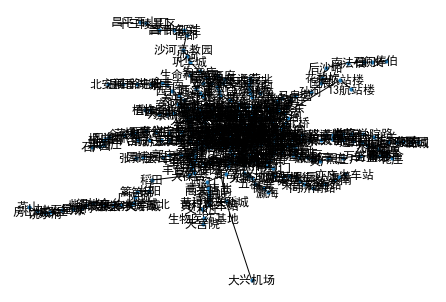

In [271]:
stations_connection_graph = nx.Graph(station_connection)
nx.draw(stations_connection_graph,station_info,with_labels=True,node_size=10)
plt.show()

In [272]:
def search_1(graph, start, end):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        next_ = path[-1]
        if next_ in visited:
            continue
        successors = graph[next_]
        for station in successors:
            if station in path:
                continue
            new_path = path + [station]
            pathes.append(new_path)
            if station == end:
                return new_path
        visited.add(next_)

In [303]:
search_1(station_connection, '八宝山', '角门西')

['八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '莲花桥',
 '六里桥',
 '西局',
 '泥洼',
 '丰台站',
 '首经贸',
 '纪家庙',
 '草桥',
 '角门西']

In [306]:
import math
def geo_distance(start, end):
    lat1, lon1 = start
    lat2, lon2 = end
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [307]:
def get_station_distance(station1,station2):
    distance = geo_distance(station_info[station1], station_info[station2])
    return distance

In [308]:
def search_2(graph, start, end, search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        next_ = path[-1]
        if next_ in visited:
            continue
        if next_ == end:
            return path
        successors = graph[next_]
        for station in successors:
            if station in path:
                continue
            next_path = path + [station]
            pathes.append(next_path)
        pathes = search_strategy(pathes)
        visited.add(next_)

In [309]:
# 根据距离寻找最优路径
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i, j in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
        return distance
    return sorted(pathes, key = get_distance_of_path)

In [310]:
# 根据站数寻找最优路径
def sort_by_num(pathes):
    def get_num_of_path(path):
        num = len(path) + 1
        return num
    return sorted(pathes, key = get_num_of_path)

In [311]:
search_2(station_connection,"八宝山","角门西",search_strategy=sort_by_distance)

['八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '长椿街',
 '宣武门',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西']

In [312]:
search_2(station_connection,"八宝山","角门西",search_strategy=sort_by_num)

['八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '莲花桥',
 '六里桥',
 '西局',
 '泥洼',
 '丰台站',
 '首经贸',
 '纪家庙',
 '草桥',
 '角门西']